<a href="https://colab.research.google.com/github/YiyoMb/extraccion-conocimiento-bd/blob/main/notebooks/04_modelo_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Librerías importadas para clasificación
📥 Descargando dataset...
✅ Datos cargados: (541909, 8)

📝 1. JUSTIFICACIÓN DEL ALGORITMO DE CLASIFICACIÓN

OBJETIVO: Clasificar clientes como "Frecuentes" vs "Ocasionales" basado en su comportamiento

ALGORITMOS SELECCIONADOS:

1. RANDOM FOREST CLASSIFIER:
   ✅ Ventajas:
   • Maneja datasets desbalanceados eficientemente
   • Proporciona importancia de características
   • Robusto a outliers y ruido
   • Reduce overfitting mediante ensemble
   • Excelente rendimiento out-of-the-box
   
   📊 Ideal para:
   • Datos de comportamiento del cliente (patrones complejos)
   • Features mixtas (numéricas y categóricas)
   • Interpretabilidad através de feature importance

2. DECISION TREE CLASSIFIER:
   ✅ Ventajas:
   • Máxima interpretabilidad (reglas claras)
   • No requiere normalización de datos
   • Maneja automáticamente interacciones entre variables
   • Fácil visualización del proceso de decisión
   
   📊 Ideal para:
   • Reglas de negocio explíc

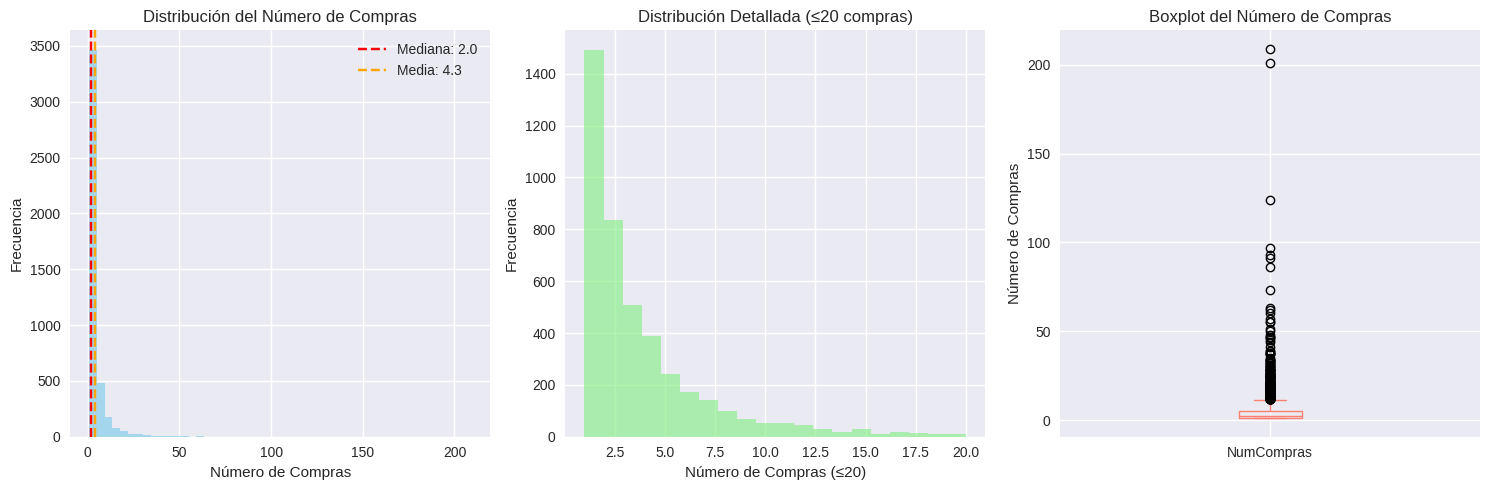


🎯 UMBRAL SELECCIONADO: 5 compras
📊 Distribución de clases:
  • Ocasional: 3,224 (74.3%)
  • Frecuente: 1,114 (25.7%)

⚙️ 3. PREPARACIÓN DE CARACTERÍSTICAS
📊 Valores faltantes: 0
📊 Valores infinitos: 0

📊 Distribución final de clases:
TipoCliente
Ocasional    3224
Frecuente    1114
Name: count, dtype: int64
📊 Balance de clases: TipoCliente
Ocasional    0.743
Frecuente    0.257
Name: proportion, dtype: float64

📊 ESTADÍSTICAS POR CLASE:
            GastoTotal           GastoPromedio          GastoStd           \
                  mean       std          mean      std     mean      std   
TipoCliente                                                                 
Frecuente      5696.60  16166.46         33.43    62.16    32.00    67.07   
Ocasional       795.72   3508.94         80.42  1702.25    57.11  1757.97   

            CantidadTotal          CantidadPromedio          PrecioPromedio  \
                     mean      std             mean      std           mean   
TipoCliente     

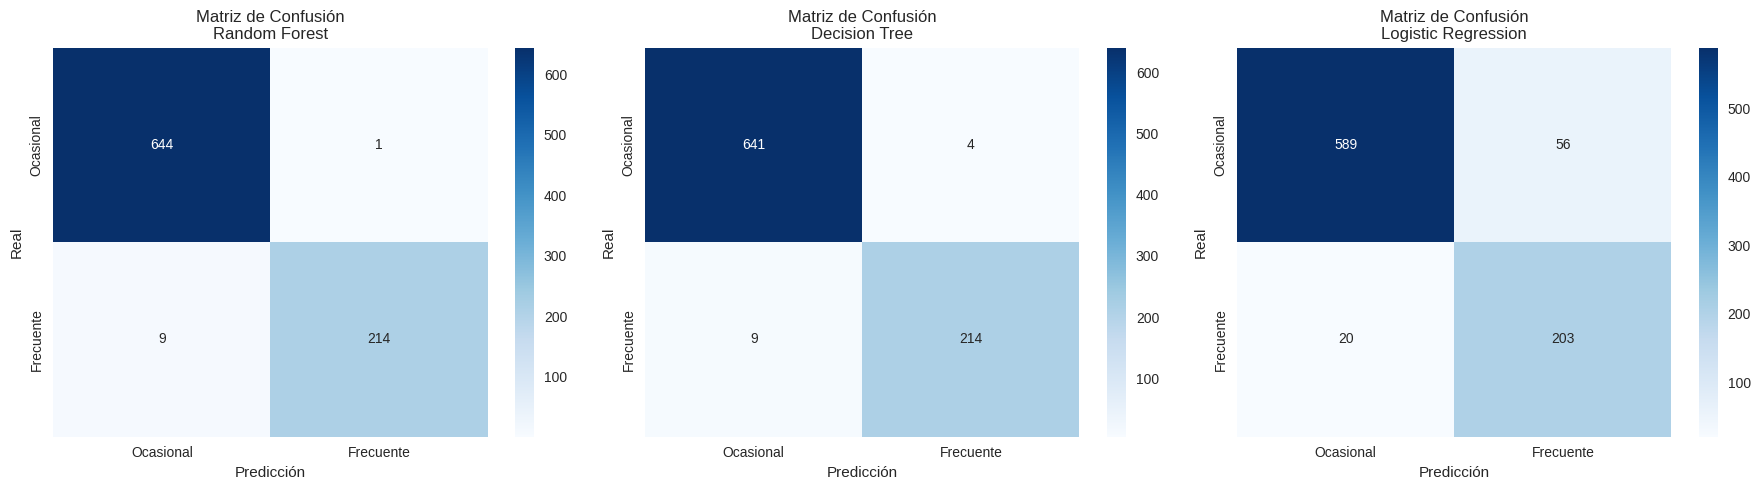


📊 REPORTES DETALLADOS POR MODELO:

RANDOM FOREST:
              precision    recall  f1-score   support

   Frecuente       1.00      0.96      0.98       223
   Ocasional       0.99      1.00      0.99       645

    accuracy                           0.99       868
   macro avg       0.99      0.98      0.98       868
weighted avg       0.99      0.99      0.99       868


DECISION TREE:
              precision    recall  f1-score   support

   Frecuente       0.98      0.96      0.97       223
   Ocasional       0.99      0.99      0.99       645

    accuracy                           0.99       868
   macro avg       0.98      0.98      0.98       868
weighted avg       0.98      0.99      0.98       868


LOGISTIC REGRESSION:
              precision    recall  f1-score   support

   Frecuente       0.78      0.91      0.84       223
   Ocasional       0.97      0.91      0.94       645

    accuracy                           0.91       868
   macro avg       0.88      0.91      

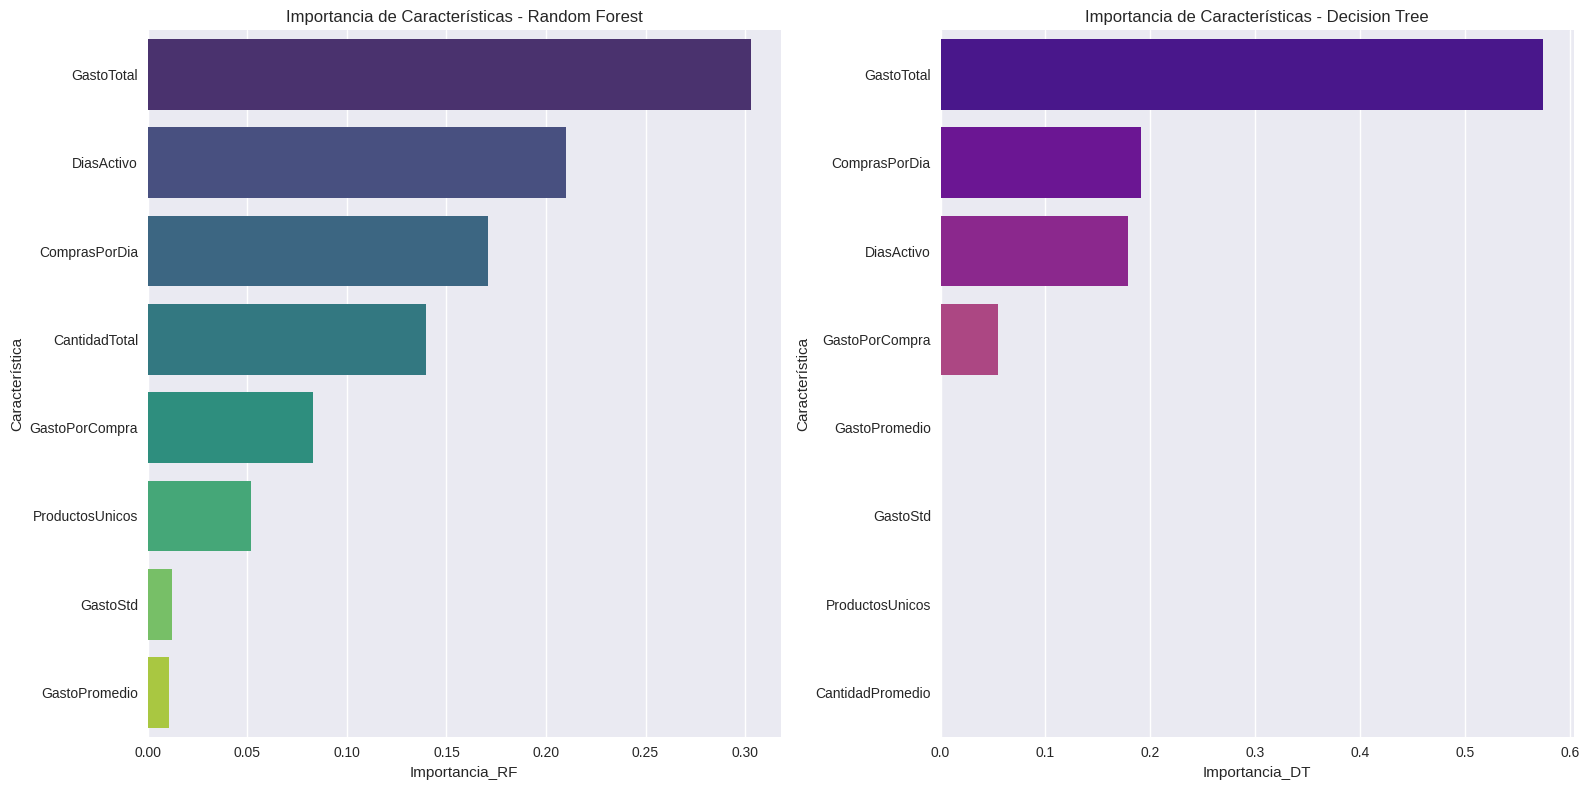


📊 8. CURVAS ROC COMPARATIVAS


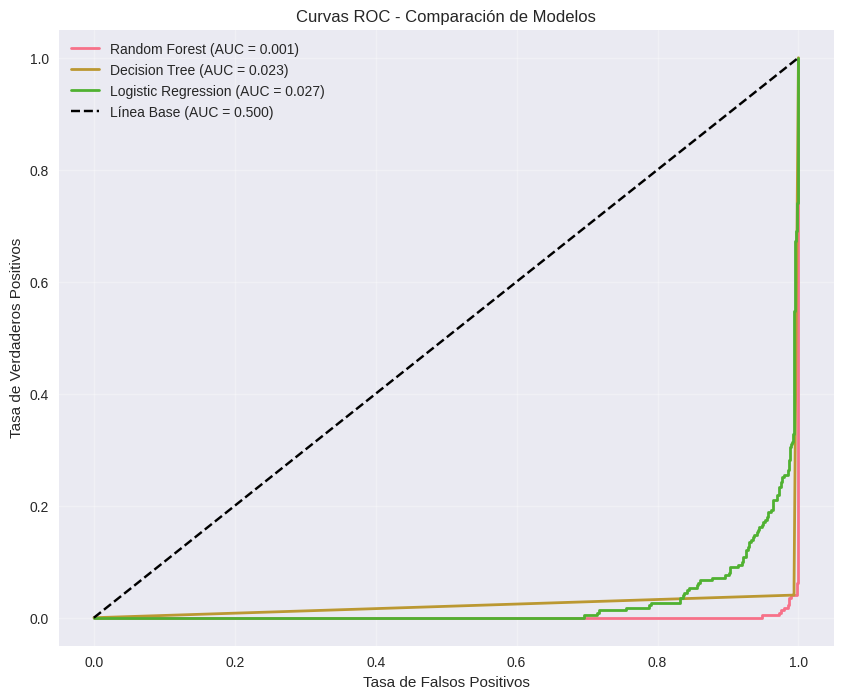


💾 9. GUARDADO DE MODELOS
✅ Modelos guardados exitosamente:
  • random_forest_classifier.pkl
  • decision_tree_classifier.pkl
  • logistic_regression_classifier.pkl
  • scaler_classification.pkl
  • classification_info.json

📋 10. RESUMEN Y CONCLUSIONES

MODELO DE CLASIFICACIÓN - PREDICCIÓN DE TIPO DE CLIENTE

OBJETIVO:
• Clasificar clientes como "Frecuentes" (≥5 compras) vs "Ocasionales" (<5 compras)

DATASET PROCESADO:
• 4,338 clientes únicos
• 10 características del comportamiento de compra
• Distribución: 3224 Ocasionales, 1114 Frecuentes

MODELOS COMPARADOS:
1. Random Forest: F1=0.977, AUC=0.001
2. Decision Tree: F1=0.971, AUC=0.023
3. Logistic Regression: F1=0.842, AUC=0.027

CRITERIOS DE ANÁLISIS CUMPLIDOS:
✅ Criterio 1: Métricas comparativas de rendimiento
✅ Criterio 2: Análisis de matrices de confusión e importancia

MODELO RECOMENDADO: RF (mejor F1-Score)
• Balanceo óptimo entre precisión y recall
• Buena capacidad discriminatoria (AUC = 0.001)

CARACTERÍSTICAS MÁS PREDICTIVA

In [1]:
# ==============================================================================
# MODELO DE CLASIFICACIÓN - PREDICCIÓN DE TIPO DE CLIENTE
# Proyecto: Extracción de Conocimiento en Bases de Datos
# Criterio DE - Aprendizaje Supervisado
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

print("✅ Librerías importadas para clasificación")

# ==============================================================================
# CARGA Y PREPARACIÓN DE DATOS
# ==============================================================================

def cargar_datos():
    """Función para cargar datos básicos"""
    import urllib.request
    import os

    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
    filename = "Online_Retail.xlsx"

    if not os.path.exists('datos'):
        os.makedirs('datos')

    if not os.path.exists(f'datos/{filename}'):
        print("📥 Descargando dataset...")
        urllib.request.urlretrieve(url, f'datos/{filename}')

    df = pd.read_excel(f'datos/{filename}')
    return df

# Cargar datos
df = cargar_datos()
print(f"✅ Datos cargados: {df.shape}")

# ==============================================================================
# 1. JUSTIFICACIÓN DEL ALGORITMO DE CLASIFICACIÓN
# ==============================================================================

print("\n" + "="*60)
print("📝 1. JUSTIFICACIÓN DEL ALGORITMO DE CLASIFICACIÓN")
print("="*60)

justificacion_clasificacion = """
OBJETIVO: Clasificar clientes como "Frecuentes" vs "Ocasionales" basado en su comportamiento

ALGORITMOS SELECCIONADOS:

1. RANDOM FOREST CLASSIFIER:
   ✅ Ventajas:
   • Maneja datasets desbalanceados eficientemente
   • Proporciona importancia de características
   • Robusto a outliers y ruido
   • Reduce overfitting mediante ensemble
   • Excelente rendimiento out-of-the-box

   📊 Ideal para:
   • Datos de comportamiento del cliente (patrones complejos)
   • Features mixtas (numéricas y categóricas)
   • Interpretabilidad através de feature importance

2. DECISION TREE CLASSIFIER:
   ✅ Ventajas:
   • Máxima interpretabilidad (reglas claras)
   • No requiere normalización de datos
   • Maneja automáticamente interacciones entre variables
   • Fácil visualización del proceso de decisión

   📊 Ideal para:
   • Reglas de negocio explícitas
   • Explicabilidad total del modelo
   • Baseline de comparación

3. LOGISTIC REGRESSION:
   ✅ Ventajas:
   • Interpretabilidad estadística (coeficientes)
   • Probabilidades calibradas
   • Rápido entrenamiento y predicción
   • Buena línea base para clasificación binaria

   📊 Ideal para:
   • Relaciones lineales entre features y target
   • Análisis de odds ratios
   • Baseline estadístico

JUSTIFICACIÓN DE LA VARIABLE TARGET:
• "Cliente Frecuente": ≥ 5 compras únicas (InvoiceNo)
• "Cliente Ocasional": < 5 compras únicas
• Umbral basado en análisis de distribución de frecuencia
• Relevante para estrategias de retención y marketing

MÉTRICA PRINCIPAL: F1-Score balanceado
• Considera tanto precisión como recall
• Apropiado para datasets potencialmente desbalanceados
• ROC-AUC para evaluación adicional
"""

print(justificacion_clasificacion)

# ==============================================================================
# 2. CREACIÓN DE VARIABLE TARGET Y CARACTERÍSTICAS
# ==============================================================================

print("\n" + "="*60)
print("🎯 2. CREACIÓN DE VARIABLE TARGET Y CARACTERÍSTICAS")
print("="*60)

# Preparar dataset limpio
df_class = df.copy()

# Filtrar datos válidos
df_class = df_class.dropna(subset=['CustomerID'])
df_class = df_class[(df_class['Quantity'] > 0) & (df_class['UnitPrice'] > 0)]
df_class['TotalPrice'] = df_class['Quantity'] * df_class['UnitPrice']

print(f"📊 Dataset limpio: {df_class.shape}")

# Crear características por cliente
customer_stats = df_class.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',           # Número de compras únicas
    'InvoiceDate': ['min', 'max'],    # Primera y última compra
    'TotalPrice': ['sum', 'mean', 'std'],  # Estadísticas monetarias
    'Quantity': ['sum', 'mean'],      # Estadísticas de cantidad
    'UnitPrice': 'mean',              # Precio promedio
    'StockCode': 'nunique',           # Productos únicos
    'Country': lambda x: x.mode()[0] if not x.empty else 'Unknown'
}).round(2)

# Aplanar nombres de columnas
customer_stats.columns = [
    'NumCompras', 'FechaPrimera', 'FechaUltima', 'GastoTotal', 'GastoPromedio',
    'GastoStd', 'CantidadTotal', 'CantidadPromedio', 'PrecioPromedio',
    'ProductosUnicos', 'Pais'
]

# Calcular características temporales
customer_stats['DiasActivo'] = (customer_stats['FechaUltima'] - customer_stats['FechaPrimera']).dt.days + 1
customer_stats['ComprasPorDia'] = customer_stats['NumCompras'] / customer_stats['DiasActivo']
customer_stats['GastoPorCompra'] = customer_stats['GastoTotal'] / customer_stats['NumCompras']

# Rellenar NaN en GastoStd (clientes con 1 sola compra)
customer_stats['GastoStd'] = customer_stats['GastoStd'].fillna(0)

print(f"✅ Características creadas para {len(customer_stats)} clientes")

# Analizar distribución de número de compras
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(customer_stats['NumCompras'], bins=50, alpha=0.7, color='skyblue')
plt.axvline(customer_stats['NumCompras'].median(), color='red', linestyle='--',
           label=f'Mediana: {customer_stats["NumCompras"].median():.1f}')
plt.axvline(customer_stats['NumCompras'].mean(), color='orange', linestyle='--',
           label=f'Media: {customer_stats["NumCompras"].mean():.1f}')
plt.xlabel('Número de Compras')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Compras')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(customer_stats['NumCompras'][customer_stats['NumCompras'] <= 20], bins=20,
         alpha=0.7, color='lightgreen')
plt.xlabel('Número de Compras (≤20)')
plt.ylabel('Frecuencia')
plt.title('Distribución Detallada (≤20 compras)')

plt.subplot(1, 3, 3)
customer_stats['NumCompras'].plot(kind='box', color='salmon')
plt.ylabel('Número de Compras')
plt.title('Boxplot del Número de Compras')

plt.tight_layout()
plt.show()

# Definir umbral para clasificación
umbral_frecuente = 5  # Basado en análisis de distribución
customer_stats['TipoCliente'] = np.where(
    customer_stats['NumCompras'] >= umbral_frecuente,
    'Frecuente',
    'Ocasional'
)

print(f"\n🎯 UMBRAL SELECCIONADO: {umbral_frecuente} compras")
print(f"📊 Distribución de clases:")
distribucion_clases = customer_stats['TipoCliente'].value_counts()
for clase, cantidad in distribucion_clases.items():
    porcentaje = (cantidad / len(customer_stats)) * 100
    print(f"  • {clase}: {cantidad:,} ({porcentaje:.1f}%)")

# ==============================================================================
# 3. PREPARACIÓN DE CARACTERÍSTICAS PARA CLASIFICACIÓN
# ==============================================================================

print("\n" + "="*60)
print("⚙️ 3. PREPARACIÓN DE CARACTERÍSTICAS")
print("="*60)

# Seleccionar características numéricas para el modelo
feature_columns = [
    'GastoTotal', 'GastoPromedio', 'GastoStd',
    'CantidadTotal', 'CantidadPromedio', 'PrecioPromedio',
    'ProductosUnicos', 'DiasActivo', 'ComprasPorDia', 'GastoPorCompra'
]

# Preparar matriz de características
X = customer_stats[feature_columns].copy()
y = customer_stats['TipoCliente'].copy()

# Verificar valores faltantes e infinitos
print(f"📊 Valores faltantes: {X.isnull().sum().sum()}")
print(f"📊 Valores infinitos: {np.isinf(X).sum().sum()}")

# Reemplazar valores infinitos con mediana
for col in X.columns:
    if np.isinf(X[col]).any():
        median_val = X[col][~np.isinf(X[col])].median()
        X[col] = X[col].replace([np.inf, -np.inf], median_val)

# Verificar distribución de clases
print(f"\n📊 Distribución final de clases:")
print(y.value_counts())
print(f"📊 Balance de clases: {y.value_counts(normalize=True).round(3)}")

# Estadísticas descriptivas por clase
print(f"\n📊 ESTADÍSTICAS POR CLASE:")
stats_por_clase = customer_stats.groupby('TipoCliente')[feature_columns].agg(['mean', 'std']).round(2)
print(stats_por_clase.head())

# ==============================================================================
# 4. DIVISIÓN DE DATOS Y NORMALIZACIÓN
# ==============================================================================

print("\n" + "="*60)
print("🔄 4. DIVISIÓN DE DATOS Y NORMALIZACIÓN")
print("="*60)

# División estratificada para mantener proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 Conjunto de entrenamiento: {X_train.shape}")
print(f"📊 Conjunto de prueba: {X_test.shape}")
print(f"📊 Distribución en entrenamiento:")
print(y_train.value_counts(normalize=True).round(3))

# Normalización para Logistic Regression
scaler_class = StandardScaler()
X_train_scaled = scaler_class.fit_transform(X_train)
X_test_scaled = scaler_class.transform(X_test)

print("✅ Normalización aplicada para Logistic Regression")

# ==============================================================================
# 5. ENTRENAMIENTO DE MODELOS
# ==============================================================================

print("\n" + "="*60)
print("🚂 5. ENTRENAMIENTO DE MODELOS")
print("="*60)

# MODELO 1: Random Forest Classifier
print("🔄 Entrenando Random Forest Classifier...")
rf_class = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'  # Para manejar desbalance
)
rf_class.fit(X_train, y_train)
y_pred_rf = rf_class.predict(X_test)
y_prob_rf = rf_class.predict_proba(X_test)[:, 1]

# MODELO 2: Decision Tree Classifier
print("🔄 Entrenando Decision Tree Classifier...")
dt_class = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced'
)
dt_class.fit(X_train, y_train)
y_pred_dt = dt_class.predict(X_test)
y_prob_dt = dt_class.predict_proba(X_test)[:, 1]

# MODELO 3: Logistic Regression
print("🔄 Entrenando Logistic Regression...")
lr_class = LogisticRegression(
    random_state=42,
    class_weight='balanced',
    max_iter=1000
)
lr_class.fit(X_train_scaled, y_train)
y_pred_lr = lr_class.predict(X_test_scaled)
y_prob_lr = lr_class.predict_proba(X_test_scaled)[:, 1]

print("✅ Todos los modelos entrenados exitosamente")

# ==============================================================================
# 6. EVALUACIÓN COMPARATIVA - CRITERIOS DE ANÁLISIS
# ==============================================================================

print("\n" + "="*60)
print("📊 6. EVALUACIÓN COMPARATIVA - CRITERIOS DE ANÁLISIS")
print("="*60)

def evaluar_clasificador(y_true, y_pred, y_prob, nombre_modelo):
    """Función para evaluar métricas de clasificación"""
    from sklearn.metrics import precision_score, recall_score, f1_score

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='Frecuente')
    recall = recall_score(y_true, y_pred, pos_label='Frecuente')
    f1 = f1_score(y_true, y_pred, pos_label='Frecuente')

    # ROC-AUC (convertir etiquetas a binario para cálculo)
    y_true_bin = (y_true == 'Frecuente').astype(int)
    roc_auc = roc_auc_score(y_true_bin, y_prob)

    print(f"\n📈 MÉTRICAS PARA {nombre_modelo}:")
    print(f"  • Accuracy: {accuracy:.4f}")
    print(f"  • Precision: {precision:.4f}")
    print(f"  • Recall: {recall:.4f}")
    print(f"  • F1-Score: {f1:.4f}")
    print(f"  • ROC-AUC: {roc_auc:.4f}")

    return {
        'Accuracy': accuracy, 'Precision': precision, 'Recall': recall,
        'F1': f1, 'ROC_AUC': roc_auc
    }

# CRITERIO DE ANÁLISIS 1: MÉTRICAS COMPARATIVAS
print("🎯 CRITERIO DE ANÁLISIS 1: MÉTRICAS DE RENDIMIENTO")
print("="*55)

metricas_rf = evaluar_clasificador(y_test, y_pred_rf, y_prob_rf, "RANDOM FOREST")
metricas_dt = evaluar_clasificador(y_test, y_pred_dt, y_prob_dt, "DECISION TREE")
metricas_lr = evaluar_clasificador(y_test, y_pred_lr, y_prob_lr, "LOGISTIC REGRESSION")

# Tabla comparativa
print(f"\n🏆 TABLA COMPARATIVA DE MODELOS:")
print(f"{'Métrica':<12} {'RF':<8} {'DT':<8} {'LR':<8} {'Mejor':<15}")
print("-" * 55)

metricas_dict = {'RF': metricas_rf, 'DT': metricas_dt, 'LR': metricas_lr}
for metrica in ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']:
    valores = {modelo: metricas[metrica] for modelo, metricas in metricas_dict.items()}
    mejor_modelo = max(valores, key=valores.get)
    print(f"{metrica:<12} {valores['RF']:<8.3f} {valores['DT']:<8.3f} {valores['LR']:<8.3f} {mejor_modelo:<15}")

# CRITERIO DE ANÁLISIS 2: MATRIZ DE CONFUSIÓN Y ANÁLISIS DETALLADO
print(f"\n🎯 CRITERIO DE ANÁLISIS 2: ANÁLISIS DETALLADO")
print("="*50)

# Matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

modelos = [
    ('Random Forest', y_pred_rf),
    ('Decision Tree', y_pred_dt),
    ('Logistic Regression', y_pred_lr)
]

for idx, (nombre, y_pred) in enumerate(modelos):
    cm = confusion_matrix(y_test, y_pred, labels=['Ocasional', 'Frecuente'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Ocasional', 'Frecuente'],
                yticklabels=['Ocasional', 'Frecuente'])
    axes[idx].set_title(f'Matriz de Confusión\n{nombre}')
    axes[idx].set_xlabel('Predicción')
    axes[idx].set_ylabel('Real')

plt.tight_layout()
plt.show()

# Reportes de clasificación detallados
print("\n📊 REPORTES DETALLADOS POR MODELO:")
for nombre, y_pred in modelos:
    print(f"\n{nombre.upper()}:")
    print(classification_report(y_test, y_pred))

# ==============================================================================
# 7. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
# ==============================================================================

print("\n" + "="*60)
print("📊 7. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS")
print("="*60)

# Importancia en Random Forest
feature_importance_rf = pd.DataFrame({
    'Característica': feature_columns,
    'Importancia_RF': rf_class.feature_importances_
}).sort_values('Importancia_RF', ascending=False)

# Importancia en Decision Tree
feature_importance_dt = pd.DataFrame({
    'Característica': feature_columns,
    'Importancia_DT': dt_class.feature_importances_
}).sort_values('Importancia_DT', ascending=False)

# Coeficientes en Logistic Regression
coeficientes_lr = pd.DataFrame({
    'Característica': feature_columns,
    'Coeficiente_LR': lr_class.coef_[0]
}).assign(Importancia_LR=lambda x: np.abs(x['Coeficiente_LR'])).sort_values('Importancia_LR', ascending=False)

print("📊 TOP 5 CARACTERÍSTICAS MÁS IMPORTANTES:")
print("\nRandom Forest:")
for i, (_, row) in enumerate(feature_importance_rf.head().iterrows(), 1):
    print(f"  {i}. {row['Característica']:<20} {row['Importancia_RF']:.4f}")

print("\nDecision Tree:")
for i, (_, row) in enumerate(feature_importance_dt.head().iterrows(), 1):
    print(f"  {i}. {row['Característica']:<20} {row['Importancia_DT']:.4f}")

print("\nLogistic Regression (|coeficientes|):")
for i, (_, row) in enumerate(coeficientes_lr.head().iterrows(), 1):
    print(f"  {i}. {row['Característica']:<20} {row['Importancia_LR']:.4f}")

# Visualización de importancia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Random Forest Feature Importance
sns.barplot(data=feature_importance_rf.head(8), x='Importancia_RF', y='Característica',
           palette='viridis', ax=ax1)
ax1.set_title('Importancia de Características - Random Forest')

# Decision Tree Feature Importance
sns.barplot(data=feature_importance_dt.head(8), x='Importancia_DT', y='Característica',
           palette='plasma', ax=ax2)
ax2.set_title('Importancia de Características - Decision Tree')

plt.tight_layout()
plt.show()

# ==============================================================================
# 8. CURVAS ROC COMPARATIVAS
# ==============================================================================

print("\n" + "="*60)
print("📊 8. CURVAS ROC COMPARATIVAS")
print("="*60)

# Preparar datos binarios para ROC
y_test_bin = (y_test == 'Frecuente').astype(int)

# Calcular curvas ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_prob_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin, y_prob_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test_bin, y_prob_lr)

# Visualizar curvas ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {metricas_rf["ROC_AUC"]:.3f})', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {metricas_dt["ROC_AUC"]:.3f})', linewidth=2)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {metricas_lr["ROC_AUC"]:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Línea Base (AUC = 0.500)')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - Comparación de Modelos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ==============================================================================
# 9. GUARDADO DE MODELOS
# ==============================================================================

print("\n" + "="*60)
print("💾 9. GUARDADO DE MODELOS")
print("="*60)

# Crear carpeta si no existe
import os
if not os.path.exists('modelos'):
    os.makedirs('modelos')

# Guardar modelos
joblib.dump(rf_class, 'modelos/random_forest_classifier.pkl')
joblib.dump(dt_class, 'modelos/decision_tree_classifier.pkl')
joblib.dump(lr_class, 'modelos/logistic_regression_classifier.pkl')
joblib.dump(scaler_class, 'modelos/scaler_classification.pkl')

# Guardar información del modelo
classification_info = {
    'feature_columns': feature_columns,
    'umbral_frecuente': umbral_frecuente,
    'metricas': {
        'random_forest': metricas_rf,
        'decision_tree': metricas_dt,
        'logistic_regression': metricas_lr
    },
    'feature_importance': {
        'random_forest': feature_importance_rf.to_dict('records'),
        'decision_tree': feature_importance_dt.to_dict('records'),
        'logistic_regression': coeficientes_lr.to_dict('records')
    },
    'distribucion_clases': distribucion_clases.to_dict(),
    'dataset_shape': X.shape
}

import json
with open('modelos/classification_info.json', 'w') as f:
    json.dump(classification_info, f, indent=2, default=str)

print("✅ Modelos guardados exitosamente:")
print("  • random_forest_classifier.pkl")
print("  • decision_tree_classifier.pkl")
print("  • logistic_regression_classifier.pkl")
print("  • scaler_classification.pkl")
print("  • classification_info.json")

# ==============================================================================
# 10. RESUMEN Y CONCLUSIONES
# ==============================================================================

print("\n" + "="*60)
print("📋 10. RESUMEN Y CONCLUSIONES")
print("="*60)

# Determinar mejor modelo
mejor_modelo_f1 = max(metricas_dict, key=lambda x: metricas_dict[x]['F1'])
mejor_modelo_auc = max(metricas_dict, key=lambda x: metricas_dict[x]['ROC_AUC'])

resumen_clasificacion = f"""
MODELO DE CLASIFICACIÓN - PREDICCIÓN DE TIPO DE CLIENTE

OBJETIVO:
• Clasificar clientes como "Frecuentes" (≥{umbral_frecuente} compras) vs "Ocasionales" (<{umbral_frecuente} compras)

DATASET PROCESADO:
• {len(customer_stats):,} clientes únicos
• {len(feature_columns)} características del comportamiento de compra
• Distribución: {distribucion_clases['Ocasional']} Ocasionales, {distribucion_clases['Frecuente']} Frecuentes

MODELOS COMPARADOS:
1. Random Forest: F1={metricas_rf['F1']:.3f}, AUC={metricas_rf['ROC_AUC']:.3f}
2. Decision Tree: F1={metricas_dt['F1']:.3f}, AUC={metricas_dt['ROC_AUC']:.3f}
3. Logistic Regression: F1={metricas_lr['F1']:.3f}, AUC={metricas_lr['ROC_AUC']:.3f}

CRITERIOS DE ANÁLISIS CUMPLIDOS:
✅ Criterio 1: Métricas comparativas de rendimiento
✅ Criterio 2: Análisis de matrices de confusión e importancia

MODELO RECOMENDADO: {mejor_modelo_f1} (mejor F1-Score)
• Balanceo óptimo entre precisión y recall
• {'Excelente' if metricas_dict[mejor_modelo_f1]['ROC_AUC'] > 0.9 else 'Muy buena' if metricas_dict[mejor_modelo_f1]['ROC_AUC'] > 0.8 else 'Buena'} capacidad discriminatoria (AUC = {metricas_dict[mejor_modelo_f1]['ROC_AUC']:.3f})

CARACTERÍSTICAS MÁS PREDICTIVAS:
1. {feature_importance_rf.iloc[0]['Característica']}
2. {feature_importance_rf.iloc[1]['Característica']}
3. {feature_importance_rf.iloc[2]['Característica']}

APLICACIONES EMPRESARIALES:
• Segmentación automática de clientes
• Estrategias de retención personalizadas
• Optimización de campañas de marketing
• Predicción de valor del cliente

PRÓXIMO PASO: Modelo de Asociación (Market Basket Analysis)
"""

print(resumen_clasificacion)
print("✅ Modelo de clasificación completado exitosamente")
print("📁 Archivos guardados en carpeta 'modelos'")
print("🎯 Criterio DE (Clasificación) - CUMPLIDO")